In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
ol_path='..\\workplace_data\\olympic_data\\athlete_events.csv'
ol_data=pd.read_csv(ol_path)

In [3]:
ol_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
ol_data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
print(ol_data.iloc[5][14])

nan


In [6]:
ol_data['Medal'].fillna('DNW', inplace=True)

In [7]:
ol_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW


In [8]:
sport_athlete=ol_data['Sport'].groupby(ol_data['Sport']).count().sort_values()
sport_athlete.max()

38624

<AxesSubplot:xlabel='Sport', ylabel='Sport'>

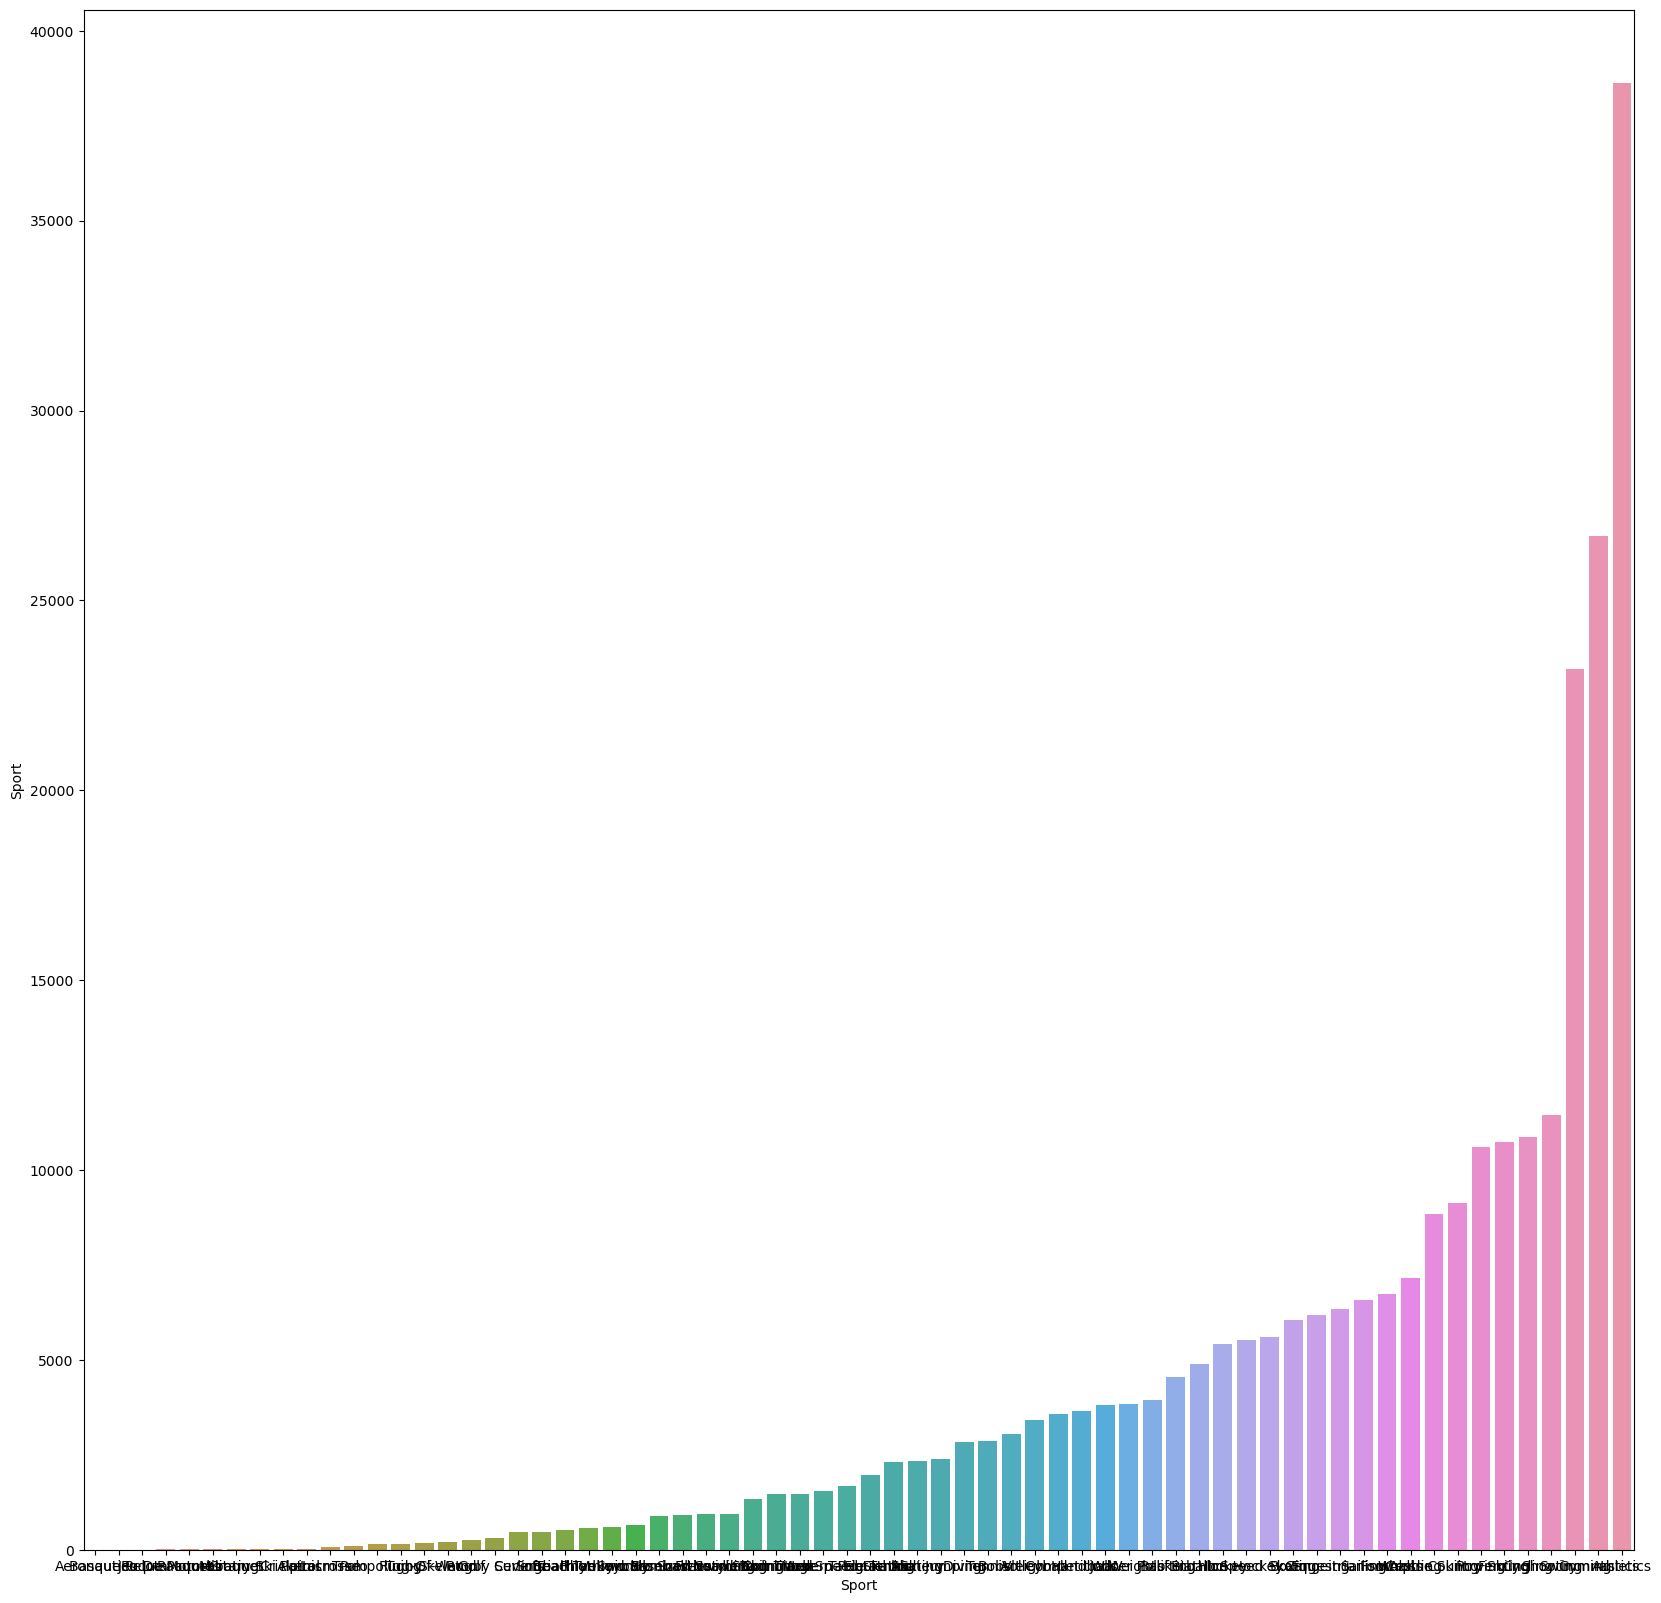

In [9]:
plt.figure(figsize=(20,20))
sns.barplot(x=sport_athlete.index, y=sport_athlete)

1.747122537787137
6.27064244661449


<AxesSubplot:xlabel='Age', ylabel='Density'>

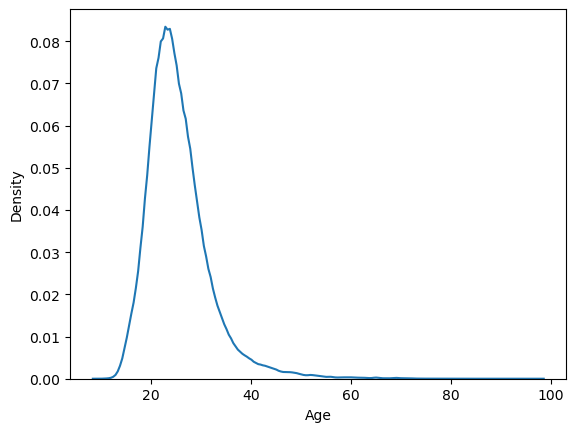

In [10]:
# null data를 평균값으로 대체해도 괜찮을까?
# 첨도를 기준으로 살펴보았다.(3이상이면 첨도가 높은 측에 속하며 평균값을 사용하는 일이 부적절할 수 있다.)
# 첨도가 낮으므로 평균값을 사용해도 괜찮을 것으로 보인다.
print(ol_data['Age'].skew())
print(ol_data['Age'].kurt())
sns.kdeplot(data=ol_data['Age'])
# 메달리스트와 나이의 관계

0.587675445694332
1.2349760195713362


<AxesSubplot:xlabel='Age', ylabel='Density'>

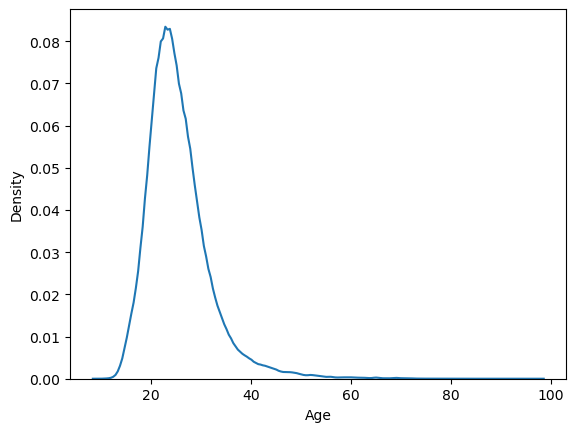

In [11]:
# Age는 첨도가 높기 때문에 log를 씌워보았다.
ol_Age_log=np.log1p(ol_data['Age'])
print(ol_Age_log.skew())
print(ol_Age_log.kurt())
sns.kdeplot(data=ol_data['Age'])

In [12]:
# log를 씌운 첨도값이 훨씬 낮아졌다. 그렇다면 log를 씌운 상태에서 평균을 구한 다음
# 그 값에서 log를 제거하면
# null 값에 대입할 평균으로 사용할 수 있지 않을까?? 라는 생각이 들었다.

# 일반 평균과 비교
print(np.expm1(ol_Age_log.mean()))
print(ol_data['Age'].mean())

24.894717620653466
25.556898357297374


0.018477298234269277
0.17772797474523294
175.33896987366376


<AxesSubplot:xlabel='Height', ylabel='Density'>

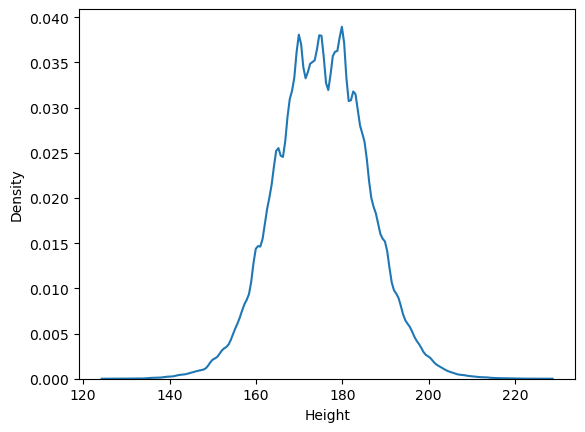

In [13]:
# 첨도가 낮으므로 평균값을 사용해도 괜찮을 것으로 보인다.
print(ol_data['Height'].skew())
print(ol_data['Height'].kurt())
print(ol_data['Height'].mean())
sns.kdeplot(data=ol_data['Height'])

0.7971690270264296
2.0175228966173915
70.70239290053351


<AxesSubplot:xlabel='Weight', ylabel='Density'>

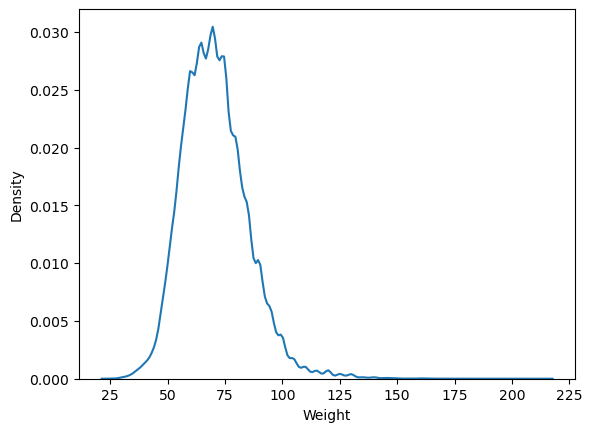

In [14]:
print(ol_data['Weight'].skew())
print(ol_data['Weight'].kurt())
print(ol_data['Weight'].mean())
sns.kdeplot(data=ol_data['Weight'])

Null 값에 만약 평균값을 사용한다면  
Age는 로그를 씌운 다움 평균을 구한 후 다시 로그를 제거한 값: 24.894717620653466  
Height는 평균값: 175.33896987366376  
Weight는 평균값: Weight는 평균값: 70.70239290053351  
적용이 적당할 것으로 보인다.  
  
  
one-hot encoding을 할 값은 값이 두 개가 아닌 모든 범주형 데이터들이다. 참고한 캐글 페이지(https://www.kaggle.com/code/nitinchoudhary012/olympics-history-basic-eda-and-medal-prediction) 에서는 Sex와 Season을 제외하고 모든 범주형 데이터를 one-hot encoding해 주었다.

ID, Name, Games, Year은 불필요 자료라 생각했는지 제거하였다.

결국 분석에 사용하는 값들은
numeric: Age, Height, Weight
cat->one-hot: Team, NOC, City, Sport, Event
cat->문자->숫자로만 변환: Sex, Season, Medal  
만 해당 캐글 페이지에서 사용하였다.  
  
한편, 도시와 NOC를 매핑시켜 개최국은 좋은 성적을 낸다 라는 가설을 증명하려는데, 개최 도시에 대해서만 나와 있지, 개최국에 대해서는 나와 있지 않다. 그래서 개최도시와 개최국의 NOC를 찾는 것을 우선적으로 하기 위해 자료를 찾았다. 아래 셀은 (https://www.kaggle.com/code/joshuaswords/does-hosting-the-olympics-improve-performance) 를 출처로 하는 코드다.

In [15]:
# 가져온 자료 
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"

일부의 데이터만 매핑이 된 것으로 보여 나머지 데이터에 대해서도 추가로 작업을 이어가기로 하였다. 

In [16]:
len(set(ol_data['City'].values))

42

위키피디아 페이지에서 적당한 자료를 찾음  
https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities  
scrape시도

In [17]:
from bs4 import BeautifulSoup
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep

In [18]:
# 위키피디어 페이지에서 개최도시-국가 매핑 자료를 가져옴
wiki_url='https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
html_data= requests.get(wiki_url)

In [19]:
driver= webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [20]:
driver.get('https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities')

In [21]:
city_list=[]
nation_list=[]

In [22]:
# 위키피디아에서 값 추출
for i in range(1,61):
    city=driver.find_element(By.XPATH, f'//*[@id="mw-content-text"]/div[1]/table[2]/tbody/tr[{i}]/td[2]/a')
    city_list.append(city.text)
    try:
        nation=driver.find_element(By.XPATH, f'//*[@id="mw-content-text"]/div[1]/table[2]/tbody/tr[{i}]/td[3]/span/a')
        nation_list.append(nation.text)
    except:
        nation=driver.find_element(By.XPATH, f'//*[@id="mw-content-text"]/div[1]/table[2]/tbody/tr[{i}]/td[3]/a')
        nation_list.append(nation.text)
    # print(f'{i}: ', city.text, nation.text)


In [23]:
#두 리스트 딕셔너리로 병합 후 dataframe화
cn_map=pd.DataFrame({'City': city_list, 'Nation': nation_list })
# 중복값 제거, reset_index(drop=True)는 기존 인덱스 완전히 제거
cn_map=cn_map.drop_duplicates().reset_index(drop=True)

어떻게 ol_data에 Nation을 붙일 것인가?  
1.merge 사용: 무슨 이유인지 모르겠지만 행이 늘어난다. left outer join이 답이라고 생각하는 데 잘 안된다.  
2.행을 한 줄씩 비교하여 값을 입력: 행 단위로 loop가 돌아가도록 놓고 조건에 맞으면 nation에 입력  
1단계: ol_data에 'Nation' column을 만들어둔다.  
2단계: 행을 한 줄씩 추출하여 for 문을 돌린다.  
3단계: 행의 'City' 에 cn_map['City']와 상응하는 값이 있다면(if)  
4단계: cn_map['Nation']을 대입한다.
예외: 
원 데이터는 Antwerpen, 위키 데이터는 Antwerp  
원 데이터는 Sankt Moritz, 위키 데이터는 St. Moritz	  
원 데이터는 Roma, 위키 데이터는 Rome  
원 데이터는 Moskva, 위키 데이터는 Moscow  
원 데이터는 Torino, 위키 데이터는 Turin  
원 데이터는 Athina, 위키 데이터는 Athens  
!!!!!!!!!!!!!!!!!!!!!! 추출 데이터 중 나라가 제대로 안 된것 확인 Tokyo-finland 존재  
위키 데이터 기준 45개에서 평창(Pyeongchang), 밀라노(Milan)는 원 데이터에 없으니 제외(2개 제외)  
Tokyo-finland값 제외하여 총 42개 도시에서 열림, 원데이터 확인 결과 도시 값은 총 42개였음  
(Tokyo-japen: 제대로 된 row 도 존재함)- Tokyo-finland 값은 그냥 잘못 나온 것으로 보임

In [24]:
# 6개의 예외값 변경
cn_map.loc[cn_map['City']=='Antwerp','City']='Antwerpen'
cn_map.loc[cn_map['City']=='St. Moritz','City']='Sankt Moritz'
cn_map.loc[cn_map['City']=='Rome','City']='Roma'
cn_map.loc[cn_map['City']=='Moscow','City']='Moskva'
cn_map.loc[cn_map['City']=='Turin','City']='Torino'
cn_map.loc[cn_map['City']=='Athens','City']='Athina'
# 원 데이터에서 사용하지 않는 데이터와 Tokyo-Finland 값 제거
cn_map.drop(14, axis=0, inplace=True)
cn_map.drop(43, axis=0, inplace=True)
cn_map.drop(44, axis=0, inplace=True)
cn_map.reset_index(drop=True)
cn_map

,City,Nation
0,Athina,Greece
1,Paris,France
2,St. Louis,United States
3,London,United Kingdom
4,Stockholm,Sweden
5,Berlin,Germany
6,Antwerpen,Belgium
7,Chamonix,France
8,Sankt Moritz,Switzerland
9,Amsterdam,Netherlands


In [25]:
# city와 nation 병합 완료, 성공적
ol_merge=ol_data.merge(cn_map, how='left', on='City')

명확하게 로직을 정리하고 넘어가자  
궁극적인 목표는 '개최국은 다른 때보다 더 좋은 성적을 내는가?'를 확인하는 것이다.  
이를 위해, athlete_events.csv에서 개최국의 선수인지 아닌지를 확인하는 작업이 필요하다.  
개최국 선수 여부를 확인하는 가장 좋은 방법은 athlete_events.csv의 선수 NOC 코드를 개최국의 NOC 코드와 비교하는 것이다.  
하지만 athlete_events.csv에는 개최 도시만 나와 있지, 개최국도, 개최국의 NOC 코드도 없다.  
그래서 개최 도시-개최국을 mapping시키는 외부 데이터를 구하여 athlete_events.csv에 개최국 column 'Nation'을 추가한 다음,(여기까지 진행)  
  
noc_regions.csv 파일에 있는 region-NOC 코드를 athlete_events.csv의 'Nation'과 mapping시켜 'hosting_NOC'를 column에 추가하고,  
athlete_events.csv에 있는 'NOC'와 'hosting_NOC'를 비교하여 같으면 1, 다르면 0을 입력하는 'host_athlete'을 column에 추가하여 개최국 선수 여부를 확인할 것이다.

In [26]:
# NOC-국가 매핑 파일 불러오기
ol_NOC=pd.read_csv('..\\workplace_data\\olympic_data\\noc_regions.csv')
# ol_NOC

In [27]:
# 'region'에서 'Nation'으로 column 변경
ol_NOC.rename(columns={'region': 'Nation'}, inplace=True)
ol_NOC

,NOC,Nation,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [28]:
# NOC-국가 매핑 파일의 국가명과 wiki에서 추출한 국가명이 같은지 확인
nation_set=set(cn_map['Nation'])
host_nation=pd.DataFrame(columns=['NOC', 'Nation', 'notes'])

# 같은 나라, 다른 명칭인 경우 수정
for i in nation_set:
    if (ol_NOC['Nation']==i).any():
        print(f'in {i}, no correction')
        # host_nation=pd.concat(host_nation, ol_NOC.loc[
        # host_nation.append(ol_NOC.loc[ol_NOC['Nation']==i, ol_NOC])
        
    elif (ol_NOC['notes']==i).any():
        print(f'note in {i}, correct region to {i}')
        ol_NOC.loc[ol_NOC['notes']==i, 'Nation']=i
        
    elif i=='West Germany':
        ol_NOC.loc[ol_NOC['NOC']=='FRG', 'Nation']=i
        # print(f'{ol_NOC.loc[ol_NOC['NOC']=='FRG', 'region']} is changed')

    elif i=='Soviet Union':
        ol_NOC.loc[ol_NOC['NOC']=='URS', 'Nation']=i
        # print(f'{ol_NOC.loc[ol_NOC['NOC']=='URS', 'region']} is changed')
        
    elif i=='United States':
        ol_NOC.loc[ol_NOC['NOC']=='USA', 'Nation']=i
        # print(f'{ol_NOC.loc[ol_NOC['NOC']=='USA', 'region']} is changed')

    elif i=='United Kingdom':
        ol_NOC.loc[ol_NOC['NOC']=='GBR', 'Nation']=i
        # print(f'{ol_NOC.loc[ol_NOC['NOC']=='GBR', 'region']} is changed')
        
    else:
        print(f'not in {i}, need correct')

# 예외: Yugoslavia(region 아닌 note에 존재)는 elif로 변경
# West Germany(FRG), Soviet Union(URS), United States(USA로 있음), United Kingdom(GBR)은
# noc_regions.csv의 region과 ol_merge의 'Nation'과 다른 방식으로 국가의 이름이 입력되어 있으며, 직접 바꿔줘야한다.
# West Germany는 FRG, East Germany는 GDR, United Team of Germany는 EUA, Germany(현재 독일)은 GER

in Greece, no correction
in Italy, no correction
in China, no correction
in Canada, no correction
note in Yugoslavia, correct region to Yugoslavia
in Brazil, no correction
in Japan, no correction
in Finland, no correction
in Russia, no correction
in Austria, no correction
in Australia, no correction
in France, no correction
in Spain, no correction
in Mexico, no correction
in Germany, no correction
in Sweden, no correction
in Belgium, no correction
in Switzerland, no correction
in Netherlands, no correction
in South Korea, no correction
in Norway, no correction


In [29]:
ol_merge_2 = pd.merge(ol_merge, ol_NOC, left_on='Nation', right_on='Nation', how='left')
# ol_merge_2=ol_merge.merge(ol_NOC, how='inner', on='Nation')
# ol_merge=ol_data.merge(cn_map, how='left', on='City')
ol_merge_2.shape

(354299, 18)

In [30]:
ol_NOC.shape

(230, 3)

In [31]:
ol_merge.shape

(271116, 16)

In [32]:
print(cn_map['Nation'])

0             Greece
1             France
2      United States
3     United Kingdom
4             Sweden
5            Germany
6            Belgium
7             France
8        Switzerland
9        Netherlands
10     United States
11     United States
12           Germany
13             Japan
15             Italy
16            Norway
17           Finland
18         Australia
19     United States
20             Italy
21           Austria
22             Japan
23            France
24            Mexico
25      West Germany
26            Canada
27      Soviet Union
28        Yugoslavia
29            Canada
30       South Korea
31            France
32             Spain
33            Norway
34     United States
35             Japan
36         Australia
37     United States
38             Italy
39             China
40            Canada
41            Russia
42            Brazil
Name: Nation, dtype: object


In [34]:
# NOC_list=['CRT', 'FRA', 'USA', 'GBR', 'SWE', 'GER', 'BEL', 'FRA', 'SUI', 'NED', 
#           'USA', 'USA', 'GER', 'JPN', 'ITA', 'NOR', 'FIN', 'AUS', 'USA', 'ITA', 
#           'AUT', 'JPN', 'FRA', 'MEX', 'FRG', 'CAN', 'KOR', 'FRA', 

In [36]:
ol_data.loc[ol_data['Sports']=='Rowing']

KeyError: 'Sports'